### **Import Module**

In [1]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from google.colab import drive
from scipy.stats import pearsonr
from fbprophet import Prophet

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### **Load Data**

In [3]:
dfStock = pd.read_csv("/content/gdrive/MyDrive/dfStock.csv")

### **Data Pre-processing & EDA**

In [4]:
#dfStock["成交股數"] = pd.to_numeric(dfStock["成交股數"])
#dfStock["成交金額"] = pd.to_numeric(dfStock["成交金額"])
dfStock["開盤價"] = pd.to_numeric(dfStock["開盤價"])
dfStock["最高價"] = pd.to_numeric(dfStock["最高價"])
dfStock["最低價"] = pd.to_numeric(dfStock["最低價"])
dfStock["收盤價"] = pd.to_numeric(dfStock["收盤價"])
#dfStock["成交筆數"] = pd.to_numeric(dfStock["成交筆數"])


Text(0, 0.5, 'NTD')

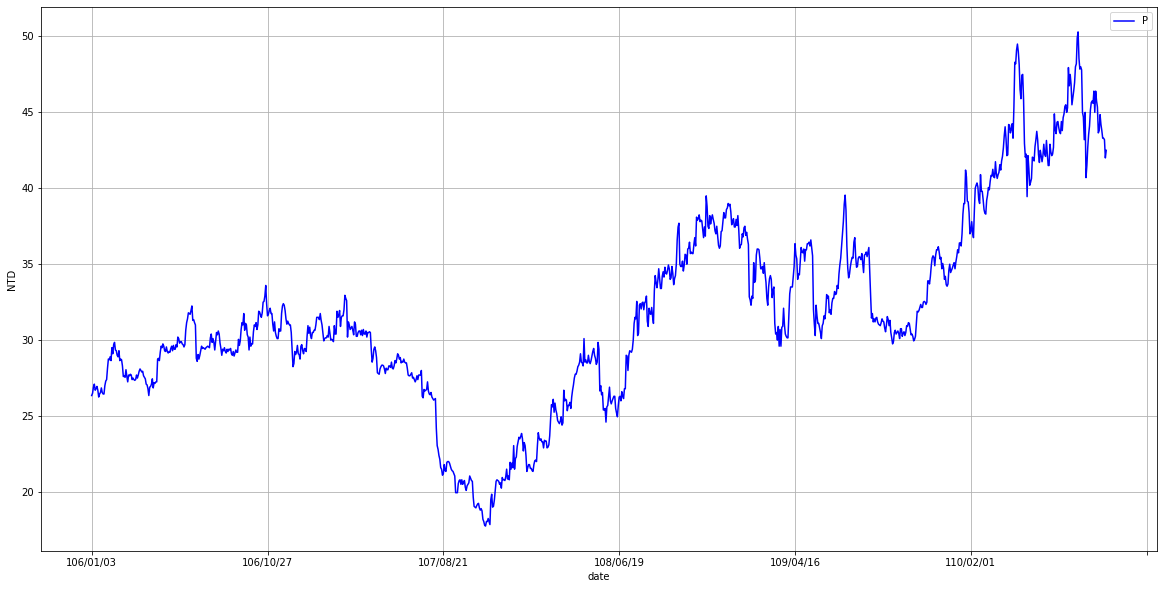

In [96]:
plt.rcParams["figure.figsize"] = (20,10)
ax = dfStock.plot(x = "日期", y = "收盤價", style = "b-", grid = True)
ax.legend("Price")
ax.set_xlabel("date")
ax.set_ylabel("NTD")

Transform New feature

震幅

In [97]:
#震幅 = (當日最高-當日最低)/前日收盤價
dfStock["當日最大價差"] = dfStock["最高價"]-dfStock["最低價"]
amplitude = [0]
for i in range(len(dfStock)-1):
  amplitude.append((dfStock["當日最大價差"][i+1]/dfStock["收盤價"][i])*100)
dfStock["震幅"] = amplitude

In [98]:
#前N日震幅
amplitude_ten = [0,0,0,0,0,0,0,0,0,0] #前10天無資料
amplitude_twenty = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
amplitude_thirty = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(10, len(dfStock)):
  amplitude_ten.append(dfStock["震幅"][i-10])
for i in range(20, len(dfStock)):
  amplitude_twenty.append(dfStock["震幅"][i-20])
for i in range(30, len(dfStock)):
  amplitude_thirty.append(dfStock["震幅"][i-30])
  dfStock["前10日震幅"] = amplitude_ten
dfStock["前20日震幅"] = amplitude_twenty
dfStock["前30日震幅"] = amplitude_thirty

In [99]:
amplitudecorr10,_ = pearsonr(dfStock["收盤價"].iloc[10:], dfStock["前10日震幅"].iloc[10:])
amplitudecorr20,_ = pearsonr(dfStock["收盤價"].iloc[20:], dfStock["前20日震幅"].iloc[20:])
amplitudecorr30,_ = pearsonr(dfStock["收盤價"].iloc[30:], dfStock["前30日震幅"].iloc[30:])

print(amplitudecorr10, amplitudecorr20, amplitudecorr30)

0.1294335377731553 0.13279177539308637 0.14841624877426166


收盤價

In [100]:
#前N日收盤價
close_ten = [0,0,0,0,0,0,0,0,0,0] #前10天無資料
close_twenty = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
close_thirty = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(10, len(dfStock)):
  close_ten.append(dfStock["收盤價"][i-10])
for i in range(20, len(dfStock)):
  close_twenty.append(dfStock["收盤價"][i-20])
for i in range(30, len(dfStock)):
  close_thirty.append(dfStock["收盤價"][i-30])
dfStock["前10日收盤價"] = close_ten
dfStock["前20日收盤價"] = close_twenty
dfStock["前30日收盤價"] = close_thirty

In [101]:
closecorr10,_ = pearsonr(dfStock["收盤價"].iloc[10:], dfStock["前10日收盤價"].iloc[10:])
closecorr20,_ = pearsonr(dfStock["收盤價"].iloc[20:], dfStock["前20日收盤價"].iloc[20:])
closecorr30,_ = pearsonr(dfStock["收盤價"].iloc[30:], dfStock["前30日收盤價"].iloc[30:])

print(closecorr10, closecorr20, closecorr30)

0.951971326891105 0.9187154728500617 0.8848022892605946


In [ ]:
plt.scatter(dfStock["收盤價"].iloc[10:], dfStock["前10日收盤價"].iloc[10:])

In [ ]:
plt.scatter(dfStock["收盤價"].iloc[20:], dfStock["前20日收盤價"].iloc[20:])

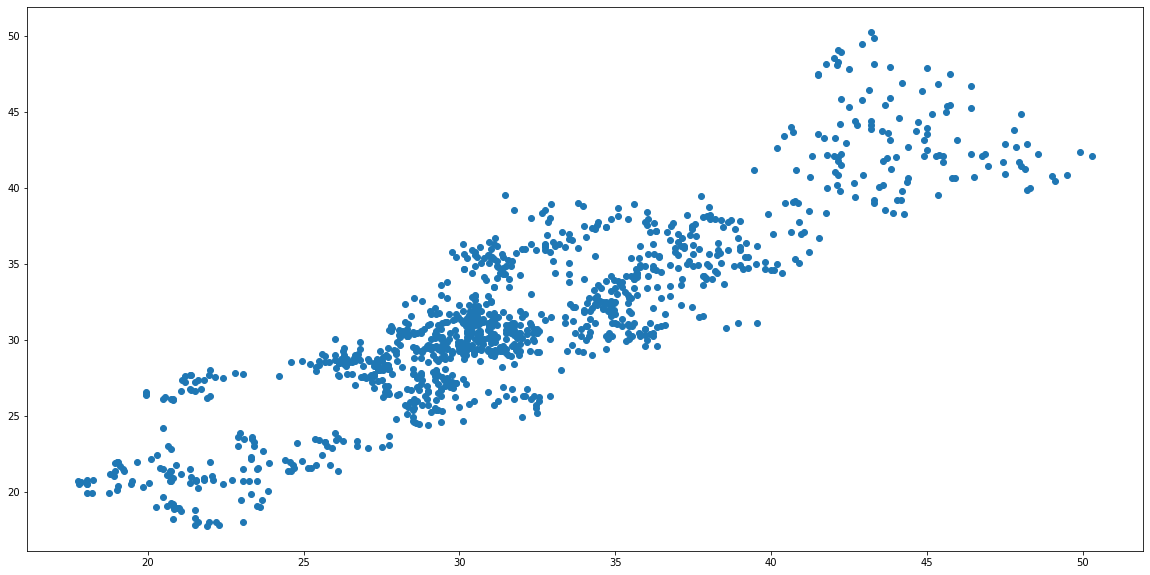

In [103]:
plt.scatter(dfStock["收盤價"].iloc[30:], dfStock["前30日收盤價"].iloc[30:])

月份與收盤價關係圖

In [104]:
month = []
for i in range(len(dfStock)):
  month.append(dfStock["日期"][i].split("/")[1])
dfStock["月份"] = month

In [105]:
dfmonthclose = dfStock[["收盤價", "月份"]].groupby(by = "月份", as_index = False).mean("收盤價")

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


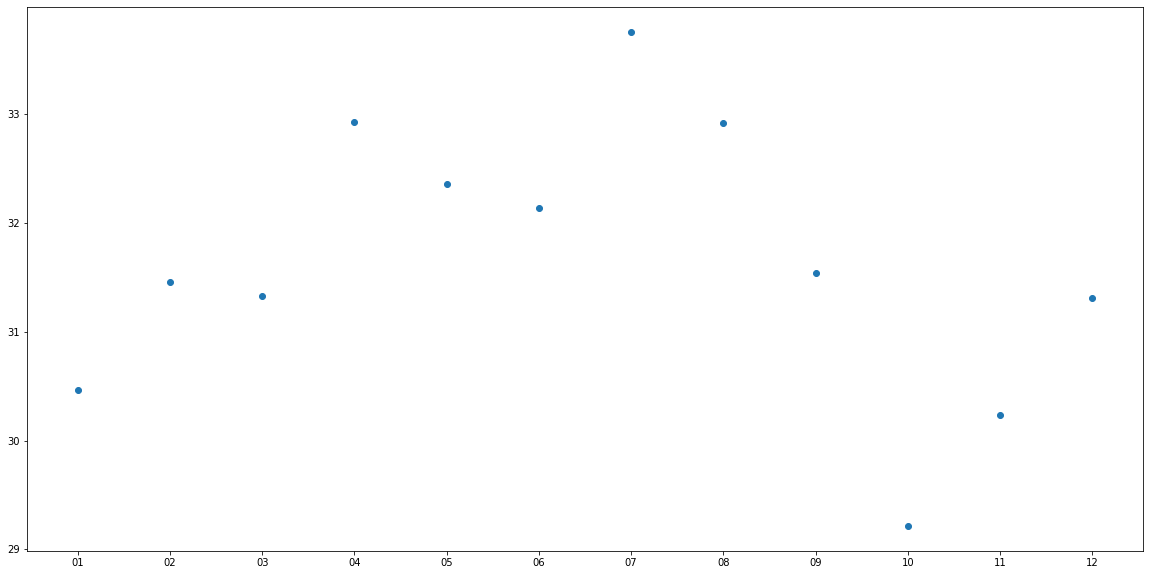

In [106]:
plt.scatter(dfmonthclose["月份"], dfmonthclose["收盤價"])

成交筆數

In [ ]:
#移除","
for i in range(len(dfStock)):
  dfStock["成交筆數"][i] = float(dfStock["成交筆數"][i].replace(",", ""))

In [108]:
#前N日成交筆數
number_ten = [0,0,0,0,0,0,0,0,0,0] #前10天無資料
number_twenty = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
number_thirty = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(10, len(dfStock)):
  number_ten.append(dfStock["成交筆數"][i-10])
for i in range(20, len(dfStock)):
  number_twenty.append(dfStock["成交筆數"][i-20])
for i in range(30, len(dfStock)):
  number_thirty.append(dfStock["成交筆數"][i-30])
dfStock["前10日成交筆數"] = number_ten
dfStock["前20日成交筆數"] = number_twenty
dfStock["前30日成交筆數"] = number_thirty

In [109]:
numbercorr10,_ = pearsonr(dfStock["收盤價"].iloc[10:], dfStock["前10日成交筆數"].iloc[10:])
numbercorr20,_ = pearsonr(dfStock["收盤價"].iloc[20:], dfStock["前20日成交筆數"].iloc[20:])
numbercorr30,_ = pearsonr(dfStock["收盤價"].iloc[30:], dfStock["前30日成交筆數"].iloc[30:])

print(numbercorr10, numbercorr20, numbercorr30)

0.44242438801389206 0.45597117125738246 0.4596611737486063


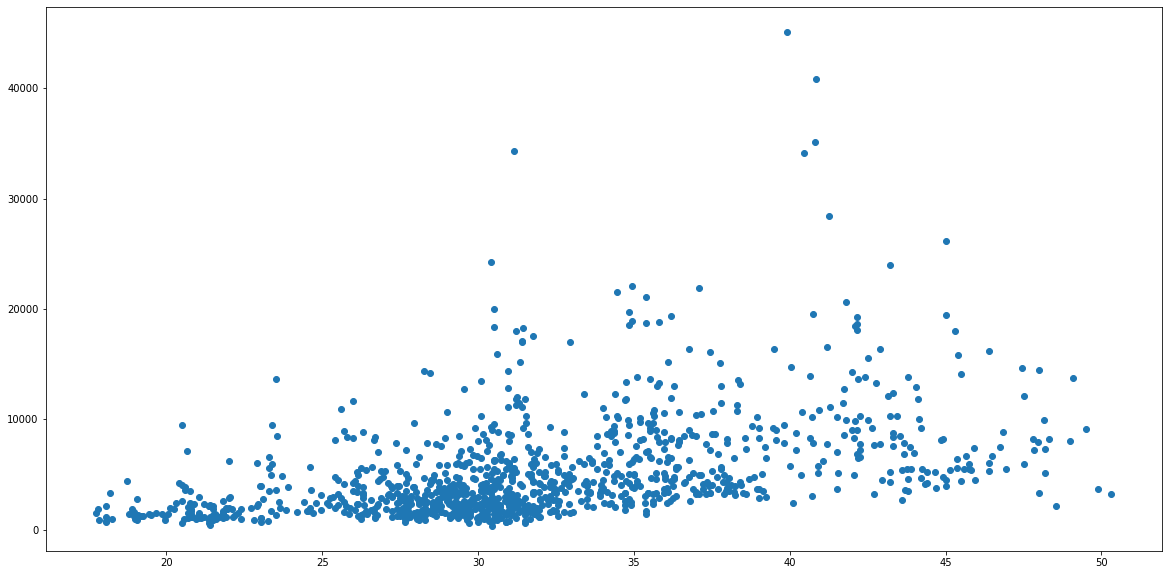

In [110]:
plt.scatter(dfStock["收盤價"].iloc[30:], dfStock["前30日成交筆數"].iloc[30:])

成交股數

In [ ]:
#移除","
for i in range(len(dfStock)):
  dfStock["成交股數"][i] = float(dfStock["成交股數"][i].replace(",", ""))

In [112]:
#前N日成交股數
numberstock_ten = [0,0,0,0,0,0,0,0,0,0] #前10天無資料
numberstock_twenty = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
numberstock_thirty = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(10, len(dfStock)):
  numberstock_ten.append(dfStock["成交股數"][i-10])
for i in range(20, len(dfStock)):
  numberstock_twenty.append(dfStock["成交股數"][i-20])
for i in range(30, len(dfStock)):
  numberstock_thirty.append(dfStock["成交股數"][i-30])
dfStock["前10日成交股數"] = numberstock_ten
dfStock["前20日成交股數"] = numberstock_twenty
dfStock["前30日成交股數"] = numberstock_thirty

In [113]:
numberstockcorr10,_ = pearsonr(dfStock["收盤價"].iloc[10:], dfStock["前10日成交股數"].iloc[10:])
numberstockcorr20,_ = pearsonr(dfStock["收盤價"].iloc[20:], dfStock["前20日成交股數"].iloc[20:])
numberstockcorr30,_ = pearsonr(dfStock["收盤價"].iloc[30:], dfStock["前30日成交股數"].iloc[30:])

print(numberstockcorr10, numberstockcorr20, numberstockcorr30)

0.38828918497169906 0.402704058465666 0.40920468017240247


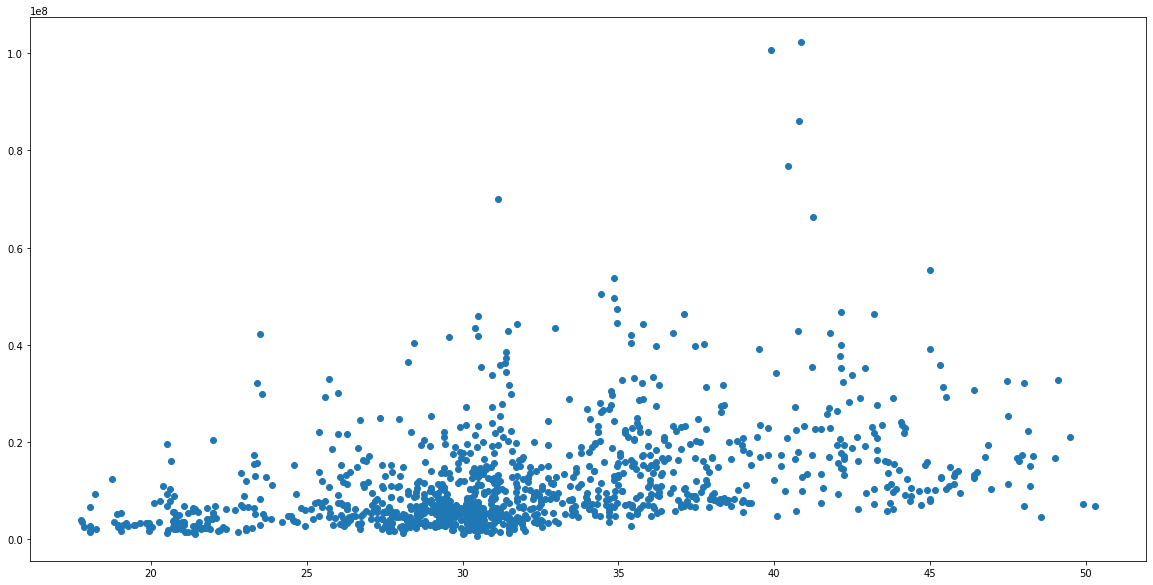

In [114]:
plt.scatter(dfStock["收盤價"].iloc[30:], dfStock["前30日成交股數"].iloc[30:])

開盤價



In [115]:
#前N日開盤價
open_ten = [0,0,0,0,0,0,0,0,0,0] #前10天無資料
open_twenty = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
open_thirty = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(10, len(dfStock)):
  open_ten.append(dfStock["開盤價"][i-10])
for i in range(20, len(dfStock)):
  open_twenty.append(dfStock["開盤價"][i-20])
for i in range(30, len(dfStock)):
  open_thirty.append(dfStock["開盤價"][i-30])
dfStock["前10日開盤價"] = open_ten
dfStock["前20日開盤價"] = open_twenty
dfStock["前30日開盤價"] = open_thirty

In [116]:
opencorr10,_ = pearsonr(dfStock["收盤價"].iloc[10:], dfStock["前10日開盤價"].iloc[10:])
opencorr20,_ = pearsonr(dfStock["收盤價"].iloc[20:], dfStock["前20日開盤價"].iloc[20:])
opencorr30,_ = pearsonr(dfStock["收盤價"].iloc[30:], dfStock["前30日開盤價"].iloc[30:])

print(opencorr10, opencorr20, opencorr30)

0.9492129033375192 0.9162052240489974 0.8831922372273919


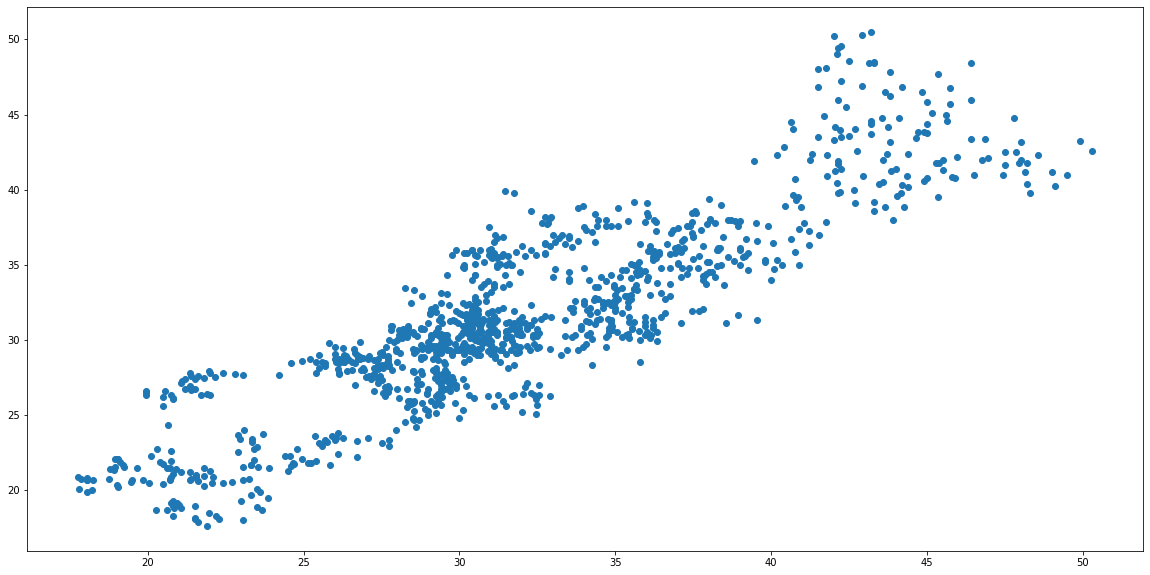

In [117]:
plt.scatter(dfStock["收盤價"].iloc[30:], dfStock["前30日開盤價"].iloc[30:])

當日最大價差

In [118]:
#前N日最大價差
diff_ten = [0,0,0,0,0,0,0,0,0,0] #前10天無資料
diff_twenty = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
diff_thirty = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(10, len(dfStock)):
  diff_ten.append(dfStock["當日最大價差"][i-10])
for i in range(20, len(dfStock)):
  diff_twenty.append(dfStock["當日最大價差"][i-20])
for i in range(30, len(dfStock)):
  diff_thirty.append(dfStock["當日最大價差"][i-30])
dfStock["前10日當日最大價差"] = diff_ten
dfStock["前20日當日最大價差"] = diff_twenty
dfStock["前30日當日最大價差"] = diff_thirty

In [119]:
diffcorr10,_ = pearsonr(dfStock["收盤價"].iloc[10:], dfStock["前10日當日最大價差"].iloc[10:])
diffcorr20,_ = pearsonr(dfStock["收盤價"].iloc[20:], dfStock["前20日當日最大價差"].iloc[20:])
diffcorr30,_ = pearsonr(dfStock["收盤價"].iloc[30:], dfStock["前30日當日最大價差"].iloc[30:])

print(diffcorr10, diffcorr20, diffcorr30)

0.4287992910192853 0.41390828347581715 0.41067544875820533


Standardization

In [120]:
z_score_scaler = StandardScaler()
dfStock["z_close"] = z_score_scaler.fit_transform(dfStock[["收盤價"]])
dfStock["z_open"] = z_score_scaler.fit_transform(dfStock[["開盤價"]])
dfStock["z_high"] = z_score_scaler.fit_transform(dfStock[["最高價"]])
dfStock["z_low"] = z_score_scaler.fit_transform(dfStock[["最低價"]])
dfStock["z_amplitude"] = z_score_scaler.fit_transform(dfStock[["震幅"]])

Cut training, validation, testing


In [121]:
training = dfStock[["日期", "z_close", "z_open", "z_high", "z_low", "z_amplitude"]].iloc[0:540]
validation = dfStock[["日期", "z_close", "z_open", "z_high", "z_low", "z_amplitude"]].iloc[540:720]
testing = dfStock[["日期", "z_close", "z_open", "z_high", "z_low", "z_amplitude"]].iloc[720:903]

In [122]:
x_training = training[["z_amplitude"]]
x_validation = validation[["z_amplitude"]]
x_testing = testing[["z_amplitude"]]
y_training = training[["z_close"]]
y_validation = validation[["z_close"]]
y_testing = testing[["z_close"]]

### **Train model & Predict**

**XGBoost**

In [123]:
model = XGBRegressor(n_estimators=200, max_depth=1, eta=0.05, subsample=0.7, colsample_bytree=0.8)

In [ ]:
model.fit(x_training, y_training)

In [125]:
pred = model.predict(x_validation)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_validation, pred))
print("RMSE: %f" % (rmse))

In [127]:
result = pd.DataFrame({"日期": validation["日期"], "z_close": pred})

In [128]:
val = pd.concat([training, validation])
res = pd.concat([training, result])

Text(0, 0.5, 'NTD')

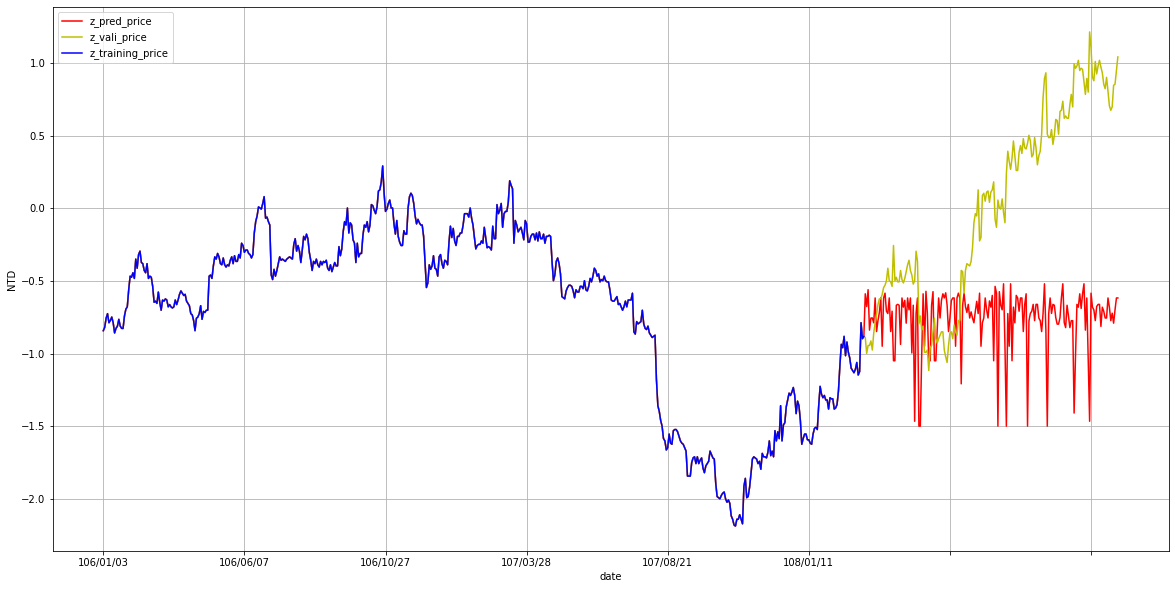

In [129]:
ax = res.plot(x = "日期", y = "z_close", style = "r-", grid = True)
ax = val.plot(x = "日期", y = "z_close", style = "y-", grid = True, ax = ax)
ax = training.plot(x = "日期", y = "z_close", style = "b-", grid = True, ax = ax)


ax.legend(["z_pred_price", "z_vali_price", "z_training_price"])
ax.set_xlabel("date")
ax.set_ylabel("NTD")

**Prophet Model**

In [ ]:
dfPredict = dfStock[["日期", "收盤價"]]
dfPredict.columns = ["ds", "y"]
dfPredict["y"] = np.log(dfPredict["y"])

for i in range(len(dfPredict)):
  if "106" in dfPredict["ds"][i]:
    dfPredict["ds"][i] = dfPredict["ds"][i].replace("106", "2017")
  elif "107" in dfPredict["ds"][i]:
    dfPredict["ds"][i] = dfPredict["ds"][i].replace("107", "2018")
  elif "108" in dfPredict["ds"][i]:
    dfPredict["ds"][i] = dfPredict["ds"][i].replace("108", "2019")
  elif "109" in dfPredict["ds"][i]:
    dfPredict["ds"][i] = dfPredict["ds"][i].replace("109", "2020")
  elif "110" in dfPredict["ds"][i]:
    dfPredict["ds"][i] = dfPredict["ds"][i].replace("110", "2021")

dfPredict["ds"] = pd.to_datetime(dfPredict["ds"], format = "%Y/%m/%d")


In [ ]:
dftrain = dfPredict.iloc[0:1000] # first 1000 be training data
dftest = dfPredict.iloc[1000:]

In [ ]:
model = Prophet()
model.fit(dftrain)

In [59]:
future = model.make_future_dataframe(periods=237)
forcast = model.predict(future)

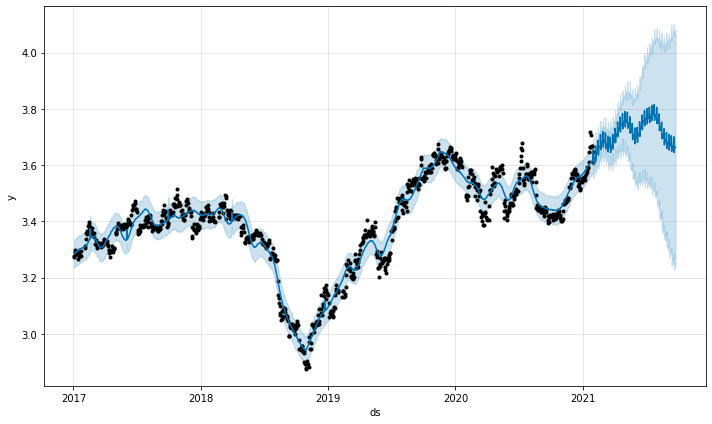

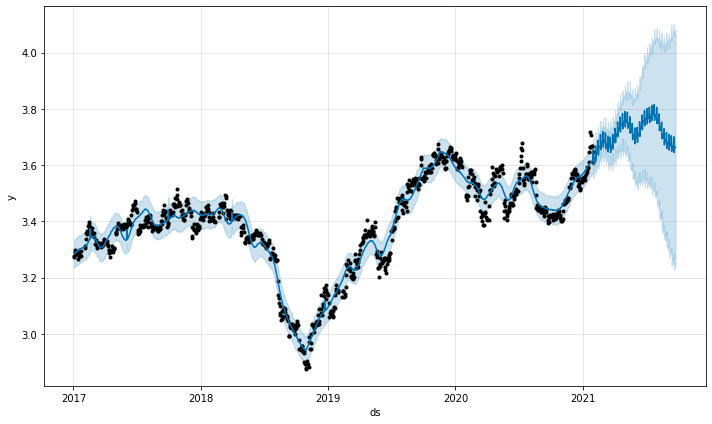

In [95]:
model.plot(forcast)

In [68]:
alldf = dfPredict.merge(forcast, left_on = "ds", right_on = "ds", how = "inner") # 合併data，移除未開盤日資料
alldf["yhat"] = np.exp(alldf["yhat"])
alldf["y"] = np.exp(alldf["y"])

Plot result

Text(0, 0.5, 'NTD')

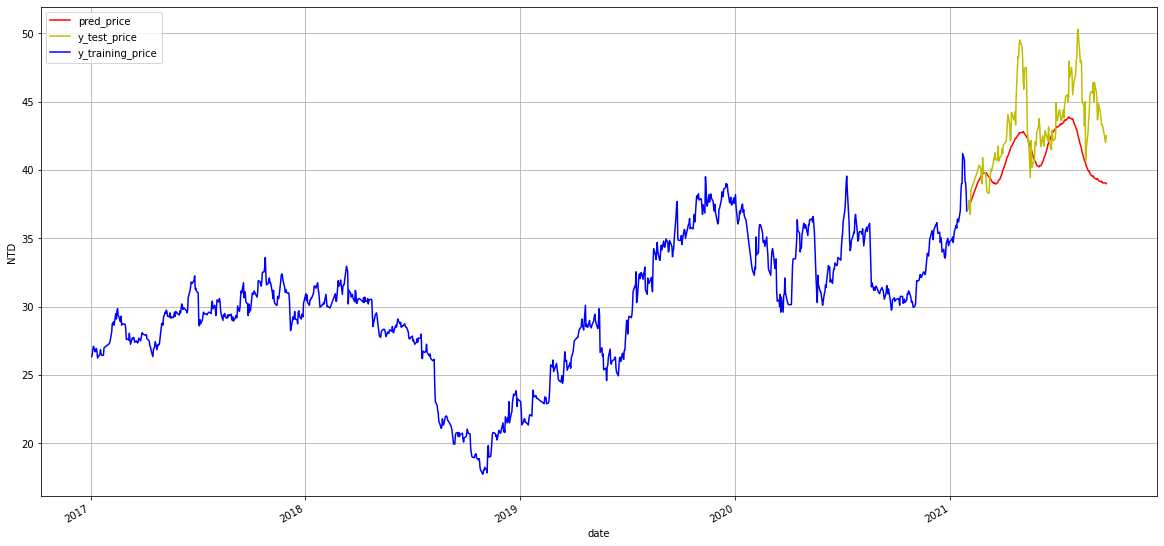

In [94]:
ax = alldf.iloc[1000:].plot(x = "ds", y = "yhat", style = "r-", grid = True)
ax = alldf.iloc[1000:].plot(x = "ds", y = "y", style = "y-", grid = True, ax = ax)
ax = alldf.iloc[0:1000].plot(x = "ds", y = "y", style = "b-", grid = True, ax = ax)


ax.legend(["pred_price", "y_test_price", "y_training_price"])
ax.set_xlabel("date")
ax.set_ylabel("NTD")